<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/Web_Crawling/%EC%9B%B9%ED%81%AC%EB%A1%A4%EB%A7%81_%EC%8B%AC%ED%99%94_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 동적페이지 크롤링하기(1)
구글 이미지 100개 가져오기

### JavaScript 가져오는 방법
1. JavaScript 판단하기


*   검사 - settings - Debugger - Display JavaScript

*   정적 페이지면 평소처럼 크롤링





2. JavaScript URL 찾아나서기

동적 기능이 부여되어있는 콘텐츠들은 JavaScript로 만들어진 녀석들이다.  
### settings -> Debugger -> Disable JavaScript  
자바스크립트를 비활성화해서, 자바스크립트 인지 아닌지 확인 

자바스크립트는 사라지고, HTML 로 만들어진 다른 이미지들이 남는다.  
땡큐인 상황  
HTML 크롤링 수행하면 됨

In [ ]:
import requests
from bs4 import BeautifulSoup

# 이후부터는 네이버웹툰 섬네일 가져온 거랑 똑같다.
# img src 링크들 수집  
url = 'https://www.google.com/search?q=%EA%B0%95%EC%95%84%EC%A7%80&authuser=1&sxsrf=ALeKk03uoYi-Af0Yrqb9ambC4KXkFgqVxA:1612744243642&source=lnms&tbm=isch&sa=X&ved=2ahUKEwj8w4W-hNnuAhXWA4gKHXajATQQ_AUoAXoECBAQAw&biw=1280&bih=610&sfr=gws&gbv=1&sei=T4YgYJH8EPy_hwOE8KXgBQ&start=' 

total_page = 5 
img_urls = []

for page in range(1, total_page+1):
    start = str(20*(page-1)) # 1 -> 0, 2-> 20, 3-> 40
    resp = requests.get(url + start)
    soup = BeautifulSoup(resp.content, 'lxml')

    for img_tag in soup.select('img')[1:]: # 구글 로고 제외
        img_urls.append(img_tag['src'])

In [ ]:
# img src들 하나씩 get -> f.write(resp.content)
for idx, img_url in enumerate(img_urls):
    resp = requests.get(img_url)

    with open('img_{:03}'.format(idx+1), 'wb') as f:
        f.write(resp.content)

# 동적 페이지 크롤링하기(2)

동적 페이지로만 짜여진 페이지는 전용 페이지 url을 찾아야한다.   
예시로 맛집 정보 공유 사이트인 블루리본서베이 사이트 크롤링을 해보도록 하자.

disable JS 를 통해 JS임을 확인했다.  
### 자바스크립트의 URL을 찾아야 한다.  

### JavaScript URL 찾기
### Network탭에 들어가면 자바스크립트 페이지의 URL을 알아낼 수 있다.
1. network 탭으로 이동(clear - 새로고침)
2. XHR, JS 의 후보들을 하나씩 확인(preview)
    - 페이지(왼쪽)과 preview(오른쪽, json) 대조
3. 해당 요소를 찾았다면, 
   headers(preview 옆)로 이동 -> General - Requests URL


그렇다. 그 url이 우리가 원하던 URL이다.

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.bluer.co.kr/api/v1/restaurants?page=0&size=30&query=&foodType=&foodTypeDetail=&feature=&location=%EA%B2%BD%EA%B8%B0%EB%8F%84&locationDetail=&area=&areaDetail=&priceRange=&ribbonType=&recommended=false&isSearchName=false&searchMode=ribbonType&zone1=&zone2=&zone2Lat=&zone2Lng='

resp = requests.get(url)

In [ ]:
# JavaScript로 작성된 것은 select를 사용할 수 없다
soup = BeautifulSoup(resp.content, 'lxml')
soup.select()

TypeError: ignored

### soup.select를 쓸 수 없다!! HTML이 아니라 JSON이라서..

page -> JSON

HTML  vs  JSON(HTML 보다 간소화)
둘다 page 데이터 

형식의 차이가 있다.

HTML : tag의 계층구조 -> BeautifulSoup, select(수식어)

JSON : dic 의 계층구조 -> 필요 X, dictionary, key


4) JSON은 딕셔너리로 변환한다.  
5) 딕셔너리에서 key값을 이용해 원하는 정보들을 파싱한다.


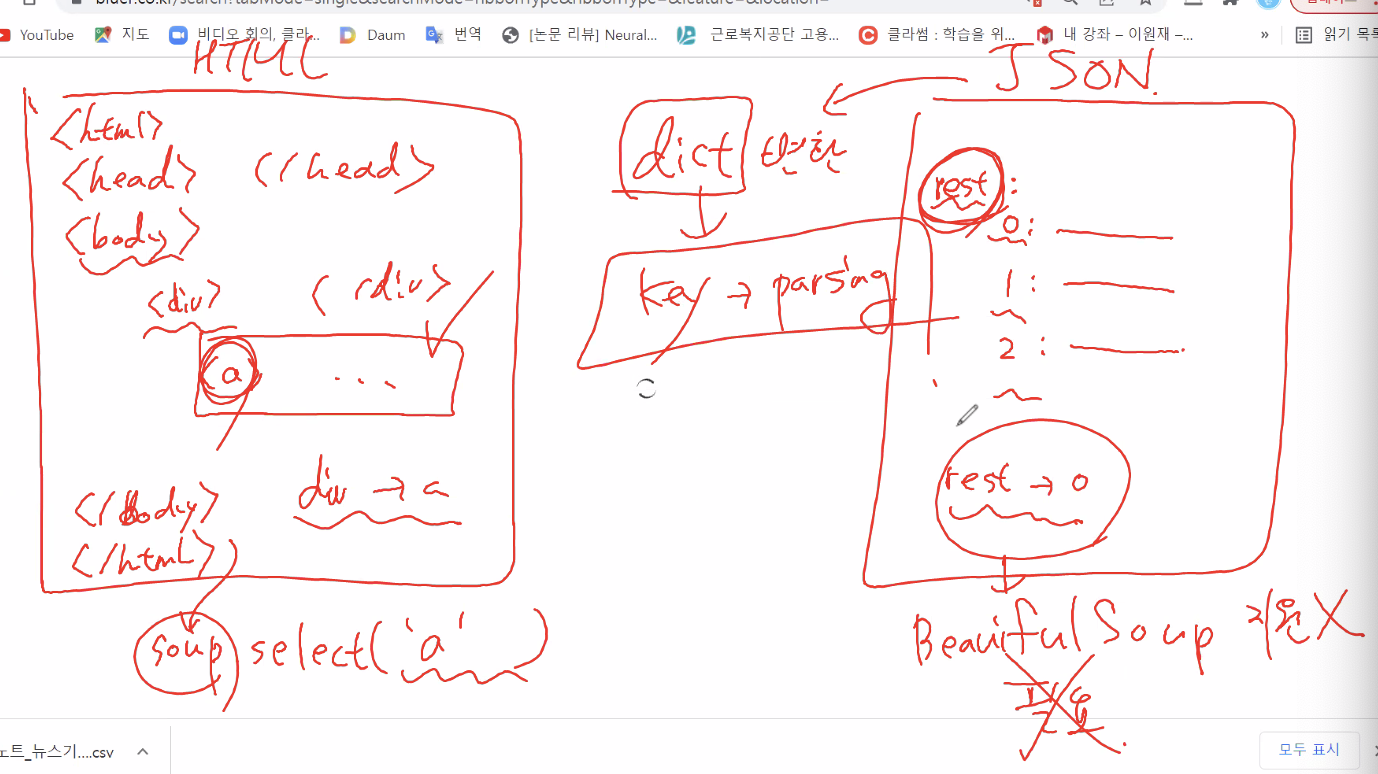

In [ ]:
# JSON 과 딕셔너리의 차이
# JSON : 딕셔너리처럼 생긴 문자열
# {'사과' : 1000} -> 이건 딕셔너리
# "{'사과' : 1000}" -> 이건 JSON

### JSON을 dict로 형변환하기

In [ ]:
dic = {'a' : {
            'b' : {
                'restaurants' : [{
                    'name' : '가보정',
                    'adress' : '수원'
                    },
                    {'name' : '한와담',
                    'adress' : '서울'
                    }]
                }
            }
        }

# dic['a'] # json은 key 파싱이 안됨 -> 딕셔너리로 형변환해야한다.
import json

jsn = json.dumps(dic) # dumps : dic -> json # ㄴㅇㄱ -> ' '
dic = json.loads(jsn) # loads : json -> dic # rose -> { }

print("'"+jsn+"'")
print()
print(dic)

'{"a": {"b": {"restaurants": [{"name": "\uac00\ubcf4\uc815", "adress": "\uc218\uc6d0"}, {"name": "\ud55c\uc640\ub2f4", "adress": "\uc11c\uc6b8"}]}}}'

{'a': {'b': {'restaurants': [{'name': '가보정', 'adress': '수원'}, {'name': '한와담', 'adress': '서울'}]}}}


In [ ]:
import requests
from bs4 import BeautifulSoup
import json 

# 자바스크립트 URL
url = 'https://www.bluer.co.kr/api/v1/restaurants?page=0&size=30&query=&foodType=&foodTypeDetail=&feature=&location=%EA%B2%BD%EA%B8%B0%EB%8F%84&locationDetail=&area=&areaDetail=&priceRange=&ribbonType=&recommended=false&isSearchName=false&searchMode=ribbonType&zone1=&zone2=&zone2Lat=&zone2Lng='

resp = requests.get(url) # resp : JSON 형태

bluers = {
    '가게명' : [],
    '리본등급' : [],
    "사이트" : [], 
    "전화번호": [], 
    "휴무": [],
    "주차":[],
    "가격범위":[],
    "메뉴":[],
    "영업시간":[]

}

dic_resp = json.loads(resp.text) # text를 loads

# 변수명은 가져올 리스트 명으로 설정
restaurants = dic_resp["_embedded"]["restaurants"]

for restaurant in restaurants:
    bluers['가게명'].append(restaurant["headerInfo"]["nameKR"])
    bluers['리본등급'].append(restaurant["headerInfo"]["ribbonType"])
    bluers["사이트"].append(restaurant["defaultInfo"]["website"])
    bluers["전화번호"].append(restaurant["defaultInfo"][ "phone"])
    bluers["휴무"].append(restaurant["defaultInfo"]["dayOff"])
    bluers["주차"].append(restaurant["statusInfo"]["parking"])
    bluers["가격범위"].append(restaurant["statusInfo"]["priceRange"])
    bluers["메뉴"].append(restaurant["statusInfo"]["menu"])
    bluers["영업시간"].append(restaurant["statusInfo"]["businessHours"])


In [ ]:
import pandas as pd

df_bluer=pd.DataFrame(bluers)
df_bluer    

,가게명,리본등급,사이트,전화번호,휴무,주차,가격범위,메뉴,영업시간
0,가보정,RIBBON_TWO,http://www.kabojong.co.kr,1600-3883,연중무휴,가능,2~4만원대,"한우생갈비(250g 7만6천원), 양념갈비(270g 5만7천원), 채끝등심(150g...","11:30~22:00 | 토, 일요일, 공휴일 11:00~22:00"
1,강천매운탕,RIBBON_TWO,http://www.365food.com/gang,031-882-5191,연중무휴,가능,2~4만원대,"빠가사리매운탕, 잡고기매운탕(각 소 5만원, 중 6만원, 대 7만원, 특 8만원),...",10:00~22:00
2,고기리막국수,RIBBON_TWO,http://고기리막국수.com/,031-263-1107,화요일 휴무,가능,1만원 미만,"물막국수, 비빔막국수, 들기름막국수(각 9천원), 수육(소 1만4천원, 중 2만1천원)",11:00~21:00(마지막 주문 20:30)
3,기와집순두부,RIBBON_TWO,,031-576-9009,명절 휴무,가능,1만원 미만,"순두부백반, 콩탕백반, 비빔밥(각 9천원), 재래식생두부, 황태양념구이(각 1만1천...",하절기 10:00~21:00 | 동절기 10:30~21:00
4,능라도,RIBBON_TWO,,031-781-3989,명절 당일 휴무,가능,1~2만원대,"평양냉면, 평양온면(각 1만4천원), 평양온반(1만2천원), 접시만두(각 1만3천원...",11:00~21:00(마지막 주문 20:30)
5,명월집,RIBBON_TWO,,031-584-4111,"월, 화, 수요일 휴무",가능,2~4만원대,돼지불고기(250g 3만원),16:00~19:30
6,사각하늘,RIBBON_TWO,,031-774-3670,"월, 화요일 휴무",가능,4~10만원대,"점심스키야키(2인 이상, 1인 4만3천원), 저녁스키야키(2인 이상, 1인 5만5천원)",12:00~22:00
7,상해루,RIBBON_TWO,http://appweb.co.kr/shanghairoo,031-8015-0103,월요일 휴무,가능,1~2만원대,"삼선짜장(8천5백원), 짬뽕(8천원) , 탕수육(소 2만원, 중 3만원), 오향장육...",11:00~15:00/17:00~22:00 | 주말 11:00~22:00
8,서동관,RIBBON_TWO,,031-922-7463,"화요일, 명절 휴무",가능,1~2만원대,"곰탕(1만3천원), 양곰탕(1만5천원), 특곰탕(1만7천원), 이공탕(2만원), 이...",09:00~21:00(마지막 주문 20:30)
9,세야스시,RIBBON_TWO,http://seyasushi.modoo.at/,031-8015-2216,월요일 휴무,가능,10~20만원대,"런치오마카세(13만원), 디너오마카세(23만원), 콜키지(5만원)",12:00~15:00/18:00~22:00


### 데이터 프레임 다루기


##### 열 추출
*   열 이름 리스트

##### 행 추출


*   df.loc[원하는 행 목록]
*   조건부 뽑기










In [ ]:
df_bluer.columns

Index(['가게명', '리본등급', '사이트', '전화번호', '휴무', '주차', '가격범위', '메뉴', '영업시간'], dtype='object')

In [ ]:
# columns 순서 변경
cols = list(df_bluer.columns)
cols.insert(1, cols.pop(-3))
cols

['가게명', '가격범위', '리본등급', '사이트', '전화번호', '휴무', '주차', '메뉴', '영업시간']

In [ ]:
# 조건 검색
cond_ribbon_2 = df_bluer['리본등급']=='RIBBON_TWO'
df_bluer[cond_ribbon_2]

,가게명,리본등급,사이트,전화번호,휴무,주차,가격범위,메뉴,영업시간
0,가보정,RIBBON_TWO,http://www.kabojong.co.kr,1600-3883,연중무휴,가능,2~4만원대,"한우생갈비(250g 7만6천원), 양념갈비(270g 5만7천원), 채끝등심(150g...","11:30~22:00 | 토, 일요일, 공휴일 11:00~22:00"
1,강천매운탕,RIBBON_TWO,http://www.365food.com/gang,031-882-5191,연중무휴,가능,2~4만원대,"빠가사리매운탕, 잡고기매운탕(각 소 5만원, 중 6만원, 대 7만원, 특 8만원),...",10:00~22:00
2,고기리막국수,RIBBON_TWO,http://고기리막국수.com/,031-263-1107,화요일 휴무,가능,1만원 미만,"물막국수, 비빔막국수, 들기름막국수(각 9천원), 수육(소 1만4천원, 중 2만1천원)",11:00~21:00(마지막 주문 20:30)
3,기와집순두부,RIBBON_TWO,,031-576-9009,명절 휴무,가능,1만원 미만,"순두부백반, 콩탕백반, 비빔밥(각 9천원), 재래식생두부, 황태양념구이(각 1만1천...",하절기 10:00~21:00 | 동절기 10:30~21:00
4,능라도,RIBBON_TWO,,031-781-3989,명절 당일 휴무,가능,1~2만원대,"평양냉면, 평양온면(각 1만4천원), 평양온반(1만2천원), 접시만두(각 1만3천원...",11:00~21:00(마지막 주문 20:30)
5,명월집,RIBBON_TWO,,031-584-4111,"월, 화, 수요일 휴무",가능,2~4만원대,돼지불고기(250g 3만원),16:00~19:30
6,사각하늘,RIBBON_TWO,,031-774-3670,"월, 화요일 휴무",가능,4~10만원대,"점심스키야키(2인 이상, 1인 4만3천원), 저녁스키야키(2인 이상, 1인 5만5천원)",12:00~22:00
7,상해루,RIBBON_TWO,http://appweb.co.kr/shanghairoo,031-8015-0103,월요일 휴무,가능,1~2만원대,"삼선짜장(8천5백원), 짬뽕(8천원) , 탕수육(소 2만원, 중 3만원), 오향장육...",11:00~15:00/17:00~22:00 | 주말 11:00~22:00
8,서동관,RIBBON_TWO,,031-922-7463,"화요일, 명절 휴무",가능,1~2만원대,"곰탕(1만3천원), 양곰탕(1만5천원), 특곰탕(1만7천원), 이공탕(2만원), 이...",09:00~21:00(마지막 주문 20:30)
9,세야스시,RIBBON_TWO,http://seyasushi.modoo.at/,031-8015-2216,월요일 휴무,가능,10~20만원대,"런치오마카세(13만원), 디너오마카세(23만원), 콜키지(5만원)",12:00~15:00/18:00~22:00


In [ ]:
# 데이터 저장
df_bluer.to_csv('블루리본서베이.csv', index=False)